# QGB without noise

In [1]:
from qiskit_aer.noise import NoiseModel
import qiskit_aer
from qiskit_aer import AerSimulator
from qiskit_aer import Aer

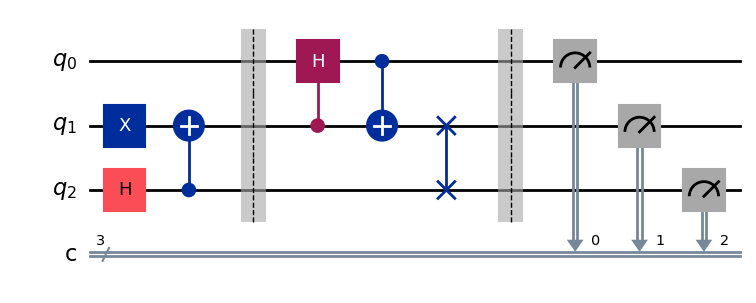

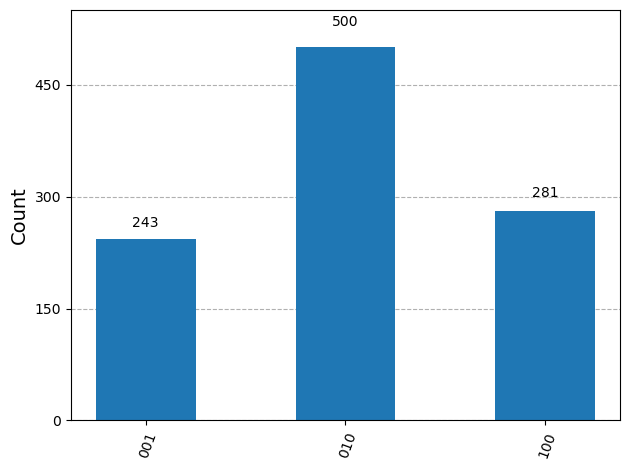

In [3]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

# n= total rows or levels of Galton Board
# Total no.of qubits = n+1
# Total no.of bins = n+1 

n=2

q=QuantumRegister(n+1,'q')
c=ClassicalRegister(n+1,'c')
qc = QuantumCircuit(q,c)
#################################################################
# n= 1 level

qc.h(q[n])
qc.x(q[n-1]) 
qc.cx(q[n], q[n-1])
qc.barrier()
#################################################################
# n=2 level
#qc.ch(q[n-1],q[n-2])
#qc.cx(q[n-2] , q[n-1])
#qc.swap(q[n-1],q[n])
#qc.barrier()
#################################################################
# start from second last qubit-Upward

if n%2==0:
    for i in range(n-1,0,-1):
        qc.ch(q[i],q[i-1])
        qc.cx(q[i-1] , q[i])
        qc.swap(q[i],q[n])
        for m in range(n-1,i,-1):
            if (i-1)%2 !=0:
                qc.swap(q[m],q[i])
        qc.barrier()

else:
    for i in range(n-1,0,-1):
        qc.ch(q[i],q[i-1])
        qc.cx(q[i-1] , q[i])
        qc.swap(q[i],q[n])
        for m in range(n-1,i,-1):
            if (i)%2 !=0:
                qc.swap(q[m],q[i])
        
        qc.barrier()


    
    
   
    
#################################################################
    
qc.measure(q,c)    

display(qc.draw('mpl'))








# Noiseless simulator
sim_ideal = AerSimulator()
qc_ideal = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(qc_ideal, shots=1024).result()
counts_ideal = result_ideal.get_counts()


plot_histogram(counts_ideal)

# QGB with noise

In [6]:
from qiskit_aer.noise import NoiseModel
noise_model = NoiseModel()

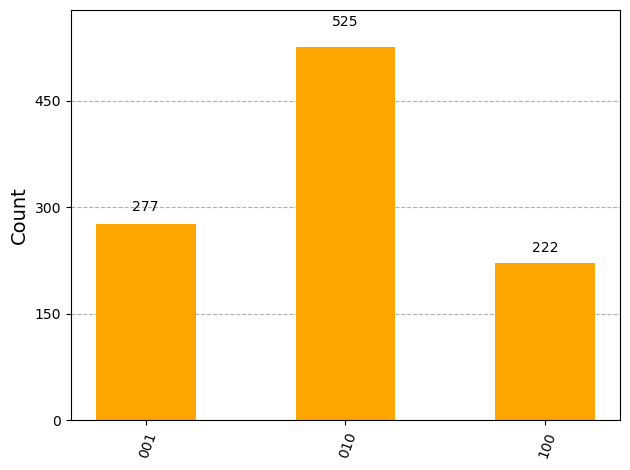

In [8]:
# Noisy simulator
sim_noisy = AerSimulator(noise_model=noise_model)
qc_noisy = transpile(qc, sim_noisy)
result_noisy = sim_noisy.run(qc_noisy, shots=1024).result()
counts_noisy = result_noisy.get_counts()
plot_histogram(counts_noisy,color='orange')

# with & without noise

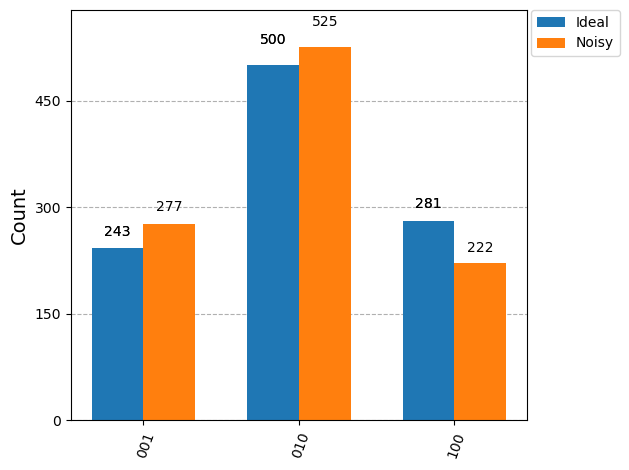

In [11]:
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])
#plt.show()

# Fidelity

In [14]:
from qiskit.quantum_info import hellinger_fidelity

fidelity = hellinger_fidelity(counts_ideal, counts_noisy)
print(f"Hellinger fidelity between ideal and noisy: {fidelity:.4f}")

Hellinger fidelity between ideal and noisy: 0.9952
